# SI 618 Homework 5 - Natural Language Processing

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. Questions 1 through 6 are worth 10 points each; Question 7 is worth 20 points.

Version 2023.10.10.1.CT

## Background
(From https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions)
### 2023 Data Scientists Jobs Descriptions
This dataset was obtained from the Google Jobs API through serpAPI and contains information about job offers for data scientists in companies based in the United States of America (USA). The data may include details such as job title, company name, location, job description, salary range, and other relevant information. The dataset is likely to be valuable for individuals seeking to understand the job market for data scientists in the USA and for companies looking to recruit data scientists. It may also be useful for researchers who are interested in exploring trends and patterns in the job market for data scientists. The data should be used with caution, as the API source may not cover all job offers in the USA and the information provided by the companies may not always be accurate or up-to-date.

The goal of this homework assignment is to investigate those job descriptions.

The data file is available via https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions/download?datasetVersionNumber=1.

Note that *you* will need to make decisions about how you
proceed with the analysis.  For example, you will need to 
decide whether you include or omit stopwords, whether you stem or lemmatize words before analysis, and how you handle weird situations.

Please fill in your uniqname in the next code cell:

In [2]:
MY_UNIQNAME = "mattcalc"

Answer each of the questions below.  You are encouraged to use as many code and markdown cells as you need for each question.

We **strongly** suggest running all cells from top to bottom before you submit your notebook.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

from collections import Counter
import re

#### Important Note
**You are not permitted to use additional packages beyond those that are already imported in the cell above, although you are welcome to import subpackages from the packages listed in the previous cell (e.g., `from spacy.lang.en.stop_words import STOP_WORDS` is fine, whereas `import fuzzywuzzy` or `from hyphenate import hyphenate_word` are not).**

## 1. What percentage of jobs include the phrase "data scientist" or "data science" in their title?  
Note that you will need to make (good) decisions about normalizing (i.e. converting to lowercase), how to handle "close" matches, etc. 
#

In [4]:
job_df = pd.read_csv("../data/Jobs.csv")
job_df

,Unnamed: 0,title,company,announcement,description
0,0,"Senior Analyst, Data Science and Analytics",TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,1,Senior Data Scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
2,2,Lead Data Science Analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ..."
3,3,Data Science Intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,4,Data Scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."
...,...,...,...,...,...
785,785,Research and Data Specialist,GovernmentJobs.com,Learn4Good.com,"Description $3,000 hiring bonus to join the J..."
786,786,Quality Assurance Data Specialist,Metrocare Services,Glassdoor,Are you looking for a purpose-driven career? A...
787,787,Senior Data Analyst,Gopuff,Startup Jobs,The Senior Data Analyst will join as an analyt...
788,788,Cost Controller/Data Analyst,Petroplan,Petroplan,Overview: The Cost Controller / Data Analyst p...


In [5]:
nlp = spacy.load("en_core_web_sm")

In [6]:
job_df_lower = job_df.copy()
job_df_lower["title"] = job_df_lower["title"].apply(lambda x: x.lower())
job_df_lower

,Unnamed: 0,title,company,announcement,description
0,0,"senior analyst, data science and analytics",TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,1,senior data scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
2,2,lead data science analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ..."
3,3,data science intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,4,data scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."
...,...,...,...,...,...
785,785,research and data specialist,GovernmentJobs.com,Learn4Good.com,"Description $3,000 hiring bonus to join the J..."
786,786,quality assurance data specialist,Metrocare Services,Glassdoor,Are you looking for a purpose-driven career? A...
787,787,senior data analyst,Gopuff,Startup Jobs,The Senior Data Analyst will join as an analyt...
788,788,cost controller/data analyst,Petroplan,Petroplan,Overview: The Cost Controller / Data Analyst p...


In [7]:
# remove punctuation from title in job_df_lower
job_df_lower["title"] = job_df_lower["title"].apply(
    lambda x: re.sub(r"[^\w\s]+", " ", x)
)
job_df_lower

,Unnamed: 0,title,company,announcement,description
0,0,senior analyst data science and analytics,TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,1,senior data scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
2,2,lead data science analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ..."
3,3,data science intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,4,data scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."
...,...,...,...,...,...
785,785,research and data specialist,GovernmentJobs.com,Learn4Good.com,"Description $3,000 hiring bonus to join the J..."
786,786,quality assurance data specialist,Metrocare Services,Glassdoor,Are you looking for a purpose-driven career? A...
787,787,senior data analyst,Gopuff,Startup Jobs,The Senior Data Analyst will join as an analyt...
788,788,cost controller data analyst,Petroplan,Petroplan,Overview: The Cost Controller / Data Analyst p...


In [8]:
# new data frame of rows which have 'data scientist' or 'data science' in the title
ds_df = job_df_lower[
    job_df_lower["title"].str.contains(
        r"\b\w*data\s+scientist\w*\b|\b\w*data\s+science\w*\b", regex=True
    )
]
ds_df.shape

(327, 5)

In [9]:
data_percentage = ds_df.shape[0] / job_df_lower.shape[0]
data_percentage

0.4139240506329114

#### Percentage of data jobs that include the phrase "data scientist" or "data science" in their title

The title column in the dataset was converted to lowercase and punctuation was removed. 

In our analysis we wanted to include titles which included data scientist or data science regardless of case or following or leading punctuation.

Based on our analysis 41.39% of the jobs in the data frame included the phrase "data scientist" or "data science" in their title.

Job titles like 'data analyst' or 'data specialist' were not included and determined to be different job titles

### 2. Create a visualization that shows the distribution of words counts of the descriptions. Omit stopwords. Describe what the visualization shows you. (Hint: a histogram is a good choice here.)

In [10]:
job_no_stop = job_df.copy()
job_no_stop["description"] = job_no_stop["description"].apply(
    lambda x: x.lower()
)

job_no_stop["doc"] = job_no_stop["description"].apply(lambda x: nlp(x))
job_no_stop

,Unnamed: 0,title,company,announcement,description,doc
0,0,"Senior Analyst, Data Science and Analytics",TransUnion,The Muse,transunion's job applicant privacy notice wha...,"(transunion, 's, job, applicant, privacy, noti..."
1,1,Senior Data Scientist,"Grubhub Holdings, Inc.",ZipRecruiter,about the opportunity we're all about connect...,"(about, the, opportunity, , we, 're, all, abo..."
2,2,Lead Data Science Analyst,Discover Financial Services,LinkedIn,"discover. a brighter future. with us, you’ll ...","(discover, ., a, brighter, future, ., , with,..."
3,3,Data Science Intern,AbelsonTaylor,Startup Jobs,are you a 2023 college graduate or rising coll...,"(are, you, a, 2023, college, graduate, or, ris..."
4,4,Data Scientist,NORC at the University of Chicago,SimplyHired,"job description: at norc, data scientists pla...","(job, description, :, , at, norc, ,, data, sc..."
...,...,...,...,...,...,...
785,785,Research and Data Specialist,GovernmentJobs.com,Learn4Good.com,"description $3,000 hiring bonus to join the j...","(description, , $, 3,000, hiring, bonus, to, ..."
786,786,Quality Assurance Data Specialist,Metrocare Services,Glassdoor,are you looking for a purpose-driven career? a...,"(are, you, looking, for, a, purpose, -, driven..."
787,787,Senior Data Analyst,Gopuff,Startup Jobs,the senior data analyst will join as an analyt...,"(the, senior, data, analyst, will, join, as, a..."
788,788,Cost Controller/Data Analyst,Petroplan,Petroplan,overview: the cost controller / data analyst p...,"(overview, :, the, cost, controller, /, data, ..."


In [11]:
job_descriptions = job_no_stop["description"].tolist()
job_descriptions = " ".join(job_descriptions)

In [12]:
# remove stop words from job_descriptions
job_descriptions = " ".join(
    [word for word in job_descriptions.split() if word not in (STOP_WORDS)]
)

In [13]:
# using counter count each word in job_descriptions
word_counts = Counter(job_descriptions.split())
word_counts
# convert to data frame
word_counts_df = pd.DataFrame.from_dict(
    word_counts, orient="index", columns=["count"]
)
word_counts_df

,count
transunion's,7
job,848
applicant,79
privacy,71
notice,28
...,...
"technician,",1
windows-based,1
collegial,1
differentials,1


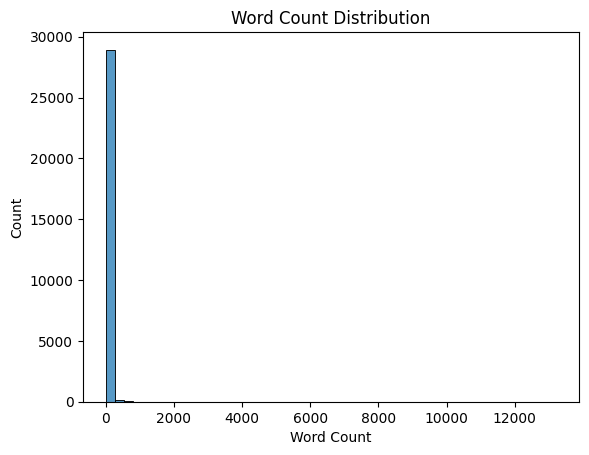

In [14]:
sns.histplot(data=word_counts_df, x="count", bins=50)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.show()

The visualization shows us that the majority of words found in all job descriptions in the dataset are only found once within the data set. 

This is likely due to the use of niche words which only apply to a single posting such as the name of a company or a specific skill set.

### 3. Based on the descriptions, create a bar chart showing the top 10 tools used by data scientists.
Here is a list of tools to consider: Python, R, SQL, Jupyter, NumPy, Pandas, Matplotlib, Seaborn, SciPy, Scikit-Learn, TensorFlow, PyTorch, Keras, XGBoost, Plotly, Dask, Spark, Hadoop, AWS, Google Cloud, Azure, IBM Watson, NLTK, OpenCV, Gensim, StatsModels, Theano, Caffe, Bokeh, Folium, ggplot, Geopandas, Yellowbrick, Flask, Dash, Streamlit, FastAPI, PySpark, TensorBoard, NetworkX, BeautifulSoup, Scrapy, Numba, Cython, Git

Provide an interpretation of your bar chart -- what does it tell you?


In [15]:
tools = "Python, R, SQL, Jupyter, NumPy, Pandas, Matplotlib, Seaborn, SciPy, Scikit-Learn, TensorFlow, PyTorch, Keras, XGBoost, Plotly, Dask, Spark, Hadoop, AWS, Google Cloud, Azure, IBM Watson, NLTK, OpenCV, Gensim, StatsModels, Theano, Caffe, Bokeh, Folium, ggplot, Geopandas, Yellowbrick, Flask, Dash, Streamlit, FastAPI, PySpark, TensorBoard, NetworkX, BeautifulSoup, Scrapy, Numba, Cython, Git"
tools = [tool.lower() for tool in tools.split(", ")]

In [16]:
# keep only words in tools from word_counts_df
tool_counts_df = word_counts_df[word_counts_df.index.isin(tools)]
tool_counts_df.reset_index(inplace=True)
tool_counts_df.columns = ["tool", "count"]
tool_counts_df.sort_values(by="count", ascending=False, inplace=True)
tool_counts_df.tool = tool_counts_df.tool.str.capitalize()
tool_counts_df

C:\Users\Matt\AppData\Local\Temp\ipykernel_18028\2221039498.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tool_counts_df.sort_values(by="count", ascending=False, inplace=True)
C:\Users\Matt\AppData\Local\Temp\ipykernel_18028\2221039498.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tool_counts_df.tool = tool_counts_df.tool.str.capitalize()


,tool,count
1,Sql,416
0,Python,240
3,R,130
5,Azure,63
2,Aws,62
4,Spark,21
9,Hadoop,19
11,Tensorflow,15
8,Jupyter,13
15,Git,12


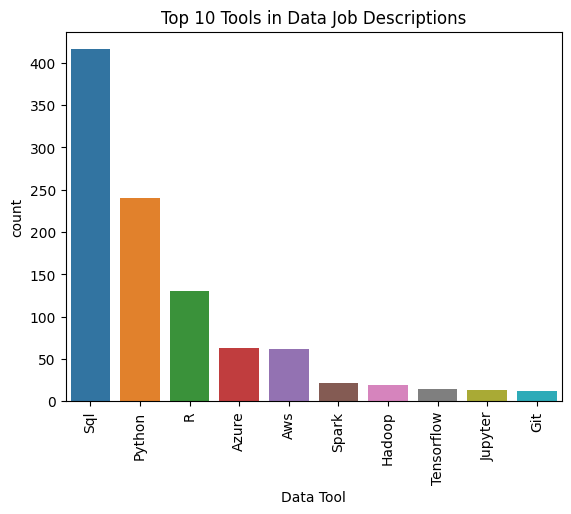

In [17]:
sns.barplot(data=tool_counts_df.head(10), x="tool", y="count")
plt.xticks(rotation=90)
plt.title("Top 10 Tools in Data Job Descriptions")
plt.xlabel("Data Tool")
plt.show()

Based on the visualization we can see that SQL, Python, and R are the three most common tools used by data scientists as determined by the data scientist job posting lists. 

These were determined from the word count of the job descriptions.

AWS, Spark, Azure, Hadoop, Tensorflow, Pandas, and Pytorch were the next 7 highest used tools by data scientists.

### 4. Create a bar chart showing the number of postings for each of the following values of the number of years of experience required:
1. <2
2. 2-4
3. 5-9
4. 10+

You will need to try a number of different approaches to extracting this information from the `description` field.

In [18]:
def extract_experience(text):
    pattern = r"(\d+)[+-]?\s?(?:to\s)?(\d+)?\s?(?:years|yrs|yr)?\s?(?:of\s)?(?:experience|exp)"
    matches = re.search(pattern, text, re.IGNORECASE)
    if matches:
        min_exp = matches.group(1)
        return int(min_exp) if int(min_exp) < 25 else None
    return None

In [19]:
experience_df = job_df.copy()
experience_df["min_years_experience"] = experience_df["description"].apply(
    extract_experience
)
experience_df.min_years_experience.value_counts()
experience_df["experience_bin"] = pd.cut(
    experience_df.min_years_experience,
    bins=[0, 2, 4, 9, np.inf],
    labels=["<2", "2-4", "5-9", "10+"],
)

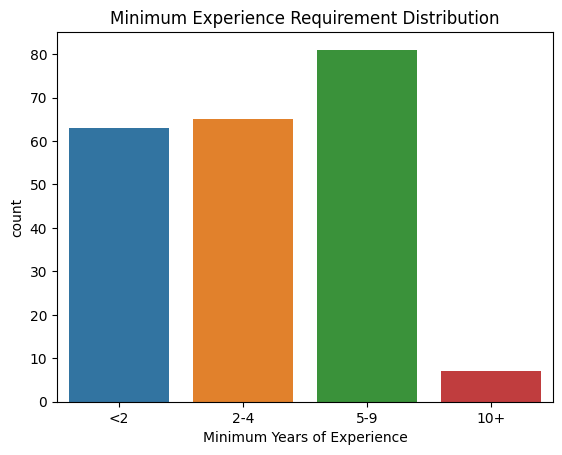

In [20]:
experience_bins = (
    experience_df.groupby("experience_bin").size().reset_index(name="count")
)
sns.barplot(data=experience_bins, x="experience_bin", y="count")
plt.title("Minimum Experience Requirement Distribution")
plt.xlabel("Minimum Years of Experience")
plt.show()

The assumption used to compare each range of experience required was the compare the minimum number of years which each description required for experience.

Additionally, minimum experience returned by the algorithm which were greater than 25 were assumed to be refering to a different quality than years of experience and were eliminated.

The most job listings required a minimum number of years of experience between 5 and 9 years. with the least requiring more than 10 years. 




### 5. What are the 5 most commonly used verbs in the job descriptions?
Is there a common theme? Are these the verbs that you would expect?

In [21]:
descriptions = " ".join(job_df["description"].tolist())
nlp.max_length = 10000000
doc = nlp(descriptions)

In [22]:
doc_verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
verbs = pd.DataFrame.from_dict(Counter(doc_verbs), orient="index")
verbs.reset_index(inplace=True)
verbs.columns = ["verb", "count"]
verbs.sort_values(by="count", ascending=False, inplace=True)
verbs.head(6)

,verb,count
14,work,2139
50,include,1788
19,•,1602
143,use,1374
49,provide,1296
145,develop,1140


The 5 most common verbs were determined by using the spacy library to parse the job descriptions and return the verbs found in each description.

The 3rd most common verb determine was the bullet point so this was excluded from the list. 

The 5 most common verbs in order were:
1. work
1. include
1. use
1. provide
1. develop

### 6. Based on the descriptions, what are the 3 most commonly mentioned organizations (hint: use Named Entity Recognition and look for ORG labels).
Do these results surprise you?  Why or why not?


In [37]:
orgs = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
tools = [tool.lower() for tool in tools]
orgs = [org for org in orgs if org.lower() not in tools]
orgs_df = pd.DataFrame.from_dict(Counter(orgs), orient="index")
orgs_df.reset_index(inplace=True)
orgs_df.columns = ["org", "count"]
orgs_df.sort_values(by="count", ascending=False, inplace=True)
orgs_df.head(50)

,org,count
118,ETL,111
234,SAS,108
87,AI,107
140,Power BI,103
33,Data Science,99
208,Microsoft,94
107,Data Scientist,93
97,ML,91
174,COVID-19,86
45,Bachelor,86


The three most commonly mentioned organizations were:
1. SQL
1. ETL
1. SAS

These results were surprising as the organization with the most listing was expected to be the 3 highest organizations.

The analysis revealed that the 3 words revealed to be the highest count organizatiton were not actually organizations but rather skills which were required for the job.

Expanding the results allows us to look for 3 organizations which are not tools that are used. 

These resulted in the top 3 organizations being:
1. Microsoft
2. Walmart
3. KPMG

These results are also surprising as we would have expected to see more larger tech companies, such as Apple or Amazon on the list. 

### Q7: Create a boxplot showing the distribution of the Flesch Reading Ease Score using all job descriptions

From https://readable.com/readability/flesch-reading-ease-flesch-kincaid-grade-level/

>The Flesch Reading Ease gives a text a score between 1 and 100, with 100 being the highest readability score. Scoring between 70 to 80 is equivalent to school grade level 8. This means text should be fairly easy for the average adult to read.
>The formula was developed in the 1940s by Rudolf Flesch. He was a consultant with the Associated Press, developing methods for improving the readability of newspapers.
>Now, over 70 years later, the Flesch Reading Ease is used by marketers, research communicators and policy writers, amongst many others. All use it to help them assess the ease by which a piece of text will be understood and engaged with.



Flesch Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW)
Here,

ASL = average sentence length (number of words divided by number of sentences)

ASW = average word length in syllables (number of syllables divided by number of words).

Please note that you will need to figure out how to handle non-sentences like bulleted lists.

Remember you are not permitted to import additional packages, so we recommend using the following starter code to count syllables.
```
def syllables(word):
    count = 0
    vowels = 'aeiouy'
    word = word.lower().strip(".:;?!")
    if word[0] in vowels:
        count +=1
    for index in range(1,len(word)):
        if word[index] in vowels and word[index-1] not in vowels:
            count +=1
    if word.endswith('e'):
        count -= 1
    if word.endswith('le'):
        count+=1
    if count == 0:
        count +=1
    return count
```
Be sure to include an interpretation of what the boxplot tells you.

In [ ]:
def syllables(word):
    count = 0
    vowels = "aeiouy"
    word = word.lower().strip(".:;?!•")
    if word == "":
        return 0
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if word.endswith("le"):
        count += 1
    if count == 0:
        count += 1
    return count

In [ ]:
job_df_lower["doc"] = job_df_lower["description"].apply(lambda x: nlp(x))

In [ ]:
ease_df = job_df_lower.copy()

ease_df["avg_words_per_sentence"] = ease_df["doc"].apply(
    lambda x: len(x) / len(list(x.sents))
)
ease_df

ease_df["avg_syllable_word"] = ease_df["description"].apply(
    lambda x: np.mean([syllables(word) for word in x.split()])
)
ease_df["flesch_score"] = (
    206.835
    - (1.015 * ease_df["avg_words_per_sentence"])
    - (84.6 * ease_df["avg_syllable_word"])
)

ease_df.head()

,Unnamed: 0,title,company,announcement,description,doc,avg_words_per_sentence,avg_syllable_word,flesch_score
0,0,senior analyst data science and analytics,TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...,"(TransUnion, 's, Job, Applicant, Privacy, Noti...",31.187500,2.001264,5.872734
1,1,senior data scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...,"(About, The, Opportunity, , We, 're, all, abo...",23.875000,1.877987,23.724139
2,2,lead data science analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ...","(Discover, ., A, brighter, future, ., , With,...",17.512821,2.023214,17.895559
3,3,data science intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...,"(Are, you, a, 2023, college, graduate, or, ris...",26.238095,1.793177,28.500561
4,4,data scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla...","(JOB, DESCRIPTION, :, , At, NORC, ,, Data, Sc...",23.078947,2.025937,12.015632


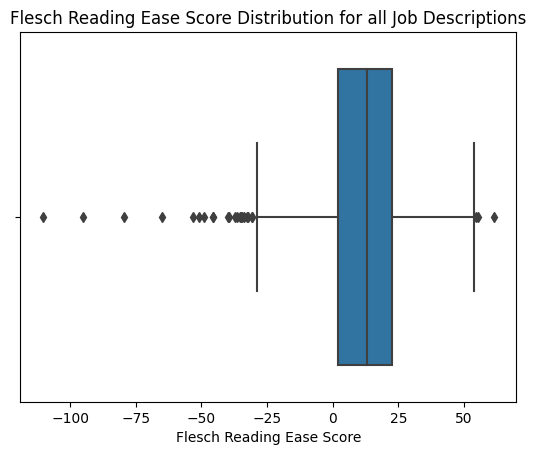

In [ ]:
sns.boxplot(data=ease_df, x="flesch_score")
plt.title("Flesch Reading Ease Score Distribution for all Job Descriptions")
plt.xlabel("Flesch Reading Ease Score")
plt.show()

The boxplot shows us that the majority of job descriptions have a Flesch Reading Ease score between 0 and 25.

The median reading score falls around 20, with the distribution ranging from -27 to -55. 

The tail skews further left. 

These results indicate that most of the job postings fall within the easy to read range.

# Please submit your notebook in .IPYNB and .HTML formats

We **strongly** suggest running all cells from top to bottom before you submit your notebook.